In [ ]:
# implementing multiple linear data set
# since the data set have multiple linear regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_index=pd.read_csv('economic_index.csv')

In [3]:
df_index

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256
5,5,2017,7,2.50,5.6,1254
6,6,2017,6,2.50,5.5,1234
7,7,2017,5,2.25,5.5,1195
8,8,2017,4,2.25,5.5,1159
9,9,2017,3,2.25,5.6,1167


In [17]:
# drop cloumn
df_index.drop(columns=["year","month"],axis=1,inplace=True)

In [19]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [ ]:
df_index.isnull().sum()#  checking for null values in the data set

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

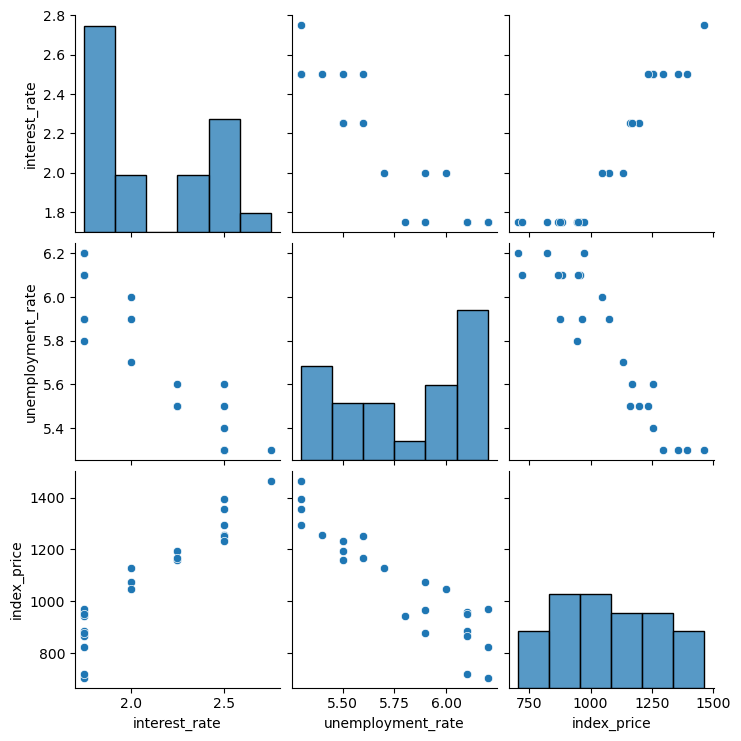

In [ ]:
# visulaiztion for checking the realtion between the independent data points and dependent data points
import seaborn as sns
sns.pairplot(df_index)

In [25]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment')

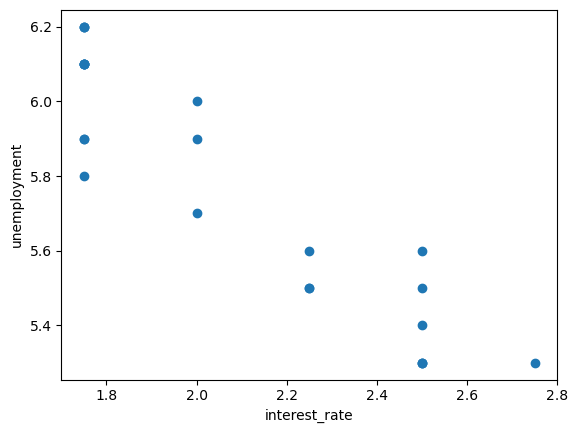

In [27]:
# visulaize the data points more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'])
plt.xlabel("interest_rate")
plt.ylabel("unemployment")

In [28]:
# get my independent and dependent feature
x=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [29]:
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [30]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

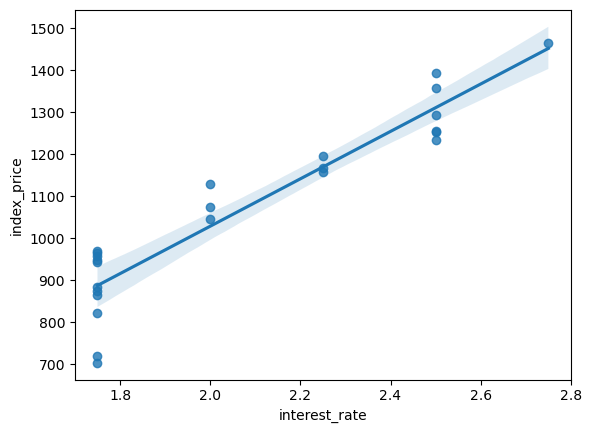

In [36]:
import seaborn as sns
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

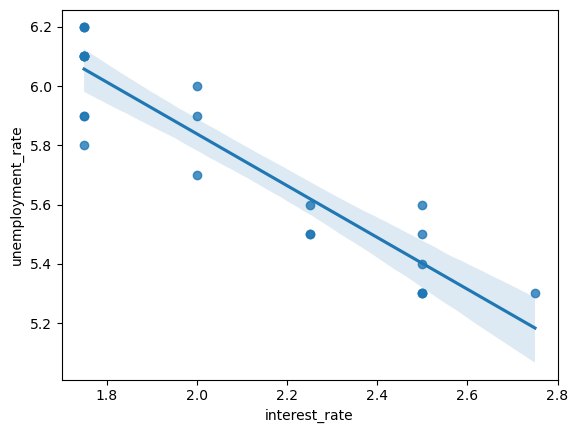

In [37]:
import seaborn as sns
sns.regplot(x=df_index['interest_rate'],y=df_index['unemployment_rate'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

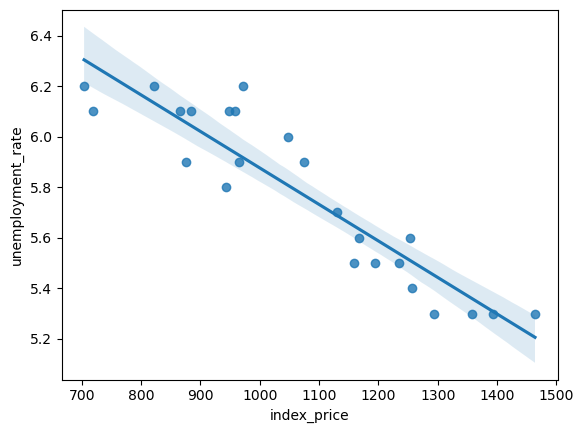

In [40]:
import seaborn as sns
sns.regplot(x=df_index['index_price'],y=df_index['unemployment_rate'])

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)# normalizing the independent feature

In [ ]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)# model is being prepared 

LinearRegression()

In [45]:
# using cross val score 
# used for cross validation


# here what is happening over here 
# dataset is broken down into train and test data set test data ---> train dataest is further broken down into train 
# train and validate ---> having multiple fold me
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)
# we have taken cv=3 we have to get three validation score

In [ ]:
validation_score.mean()#--> mean validation score

-5914.82818016239

In [49]:
y_pred=regression.predict(X_test)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [50]:
y_pred

array([612.64375972, 487.12736973, 680.03156939, 498.75308579,
       544.07270669, 601.01804366])

In [51]:
# perfromance metric

# this represnts the differenece between the actaul and the predicted points
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print(mse)
print(mae)# Here, 9.66 means that, on average, your predictions are off by about 9.66 units from the actual values.

316313.15240145795
549.3922441707886


In [52]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

-8.395998348460045


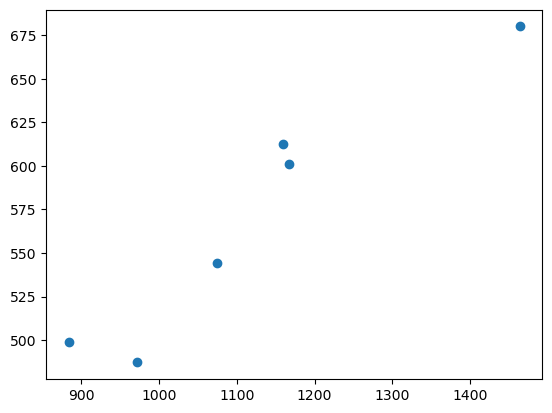

In [53]:
plt.scatter(y_test,y_pred)

In [54]:
residulas=y_test-y_pred
print(residulas)

8     546.356240
16    483.872630
0     783.968431
18    385.246914
11    530.927293
9     565.981956
Name: index_price, dtype: float64


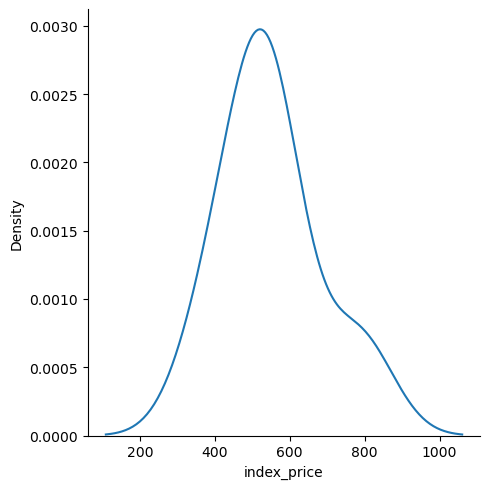

In [56]:
sns.displot(residulas,kind='kde')

In [57]:
# ols linear regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [59]:
model.summary()

c:\Users\ASUS\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sun, 14 Sep 2025   Prob (F-statistic):                       0.754
Time:                        21:58:53   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
regression.coef_

array([  88.27275507, -116.25716066])